<a href="https://colab.research.google.com/github/ha-yun/GSTEC/blob/main/15%EC%A3%BC%EC%B0%A8_210928.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

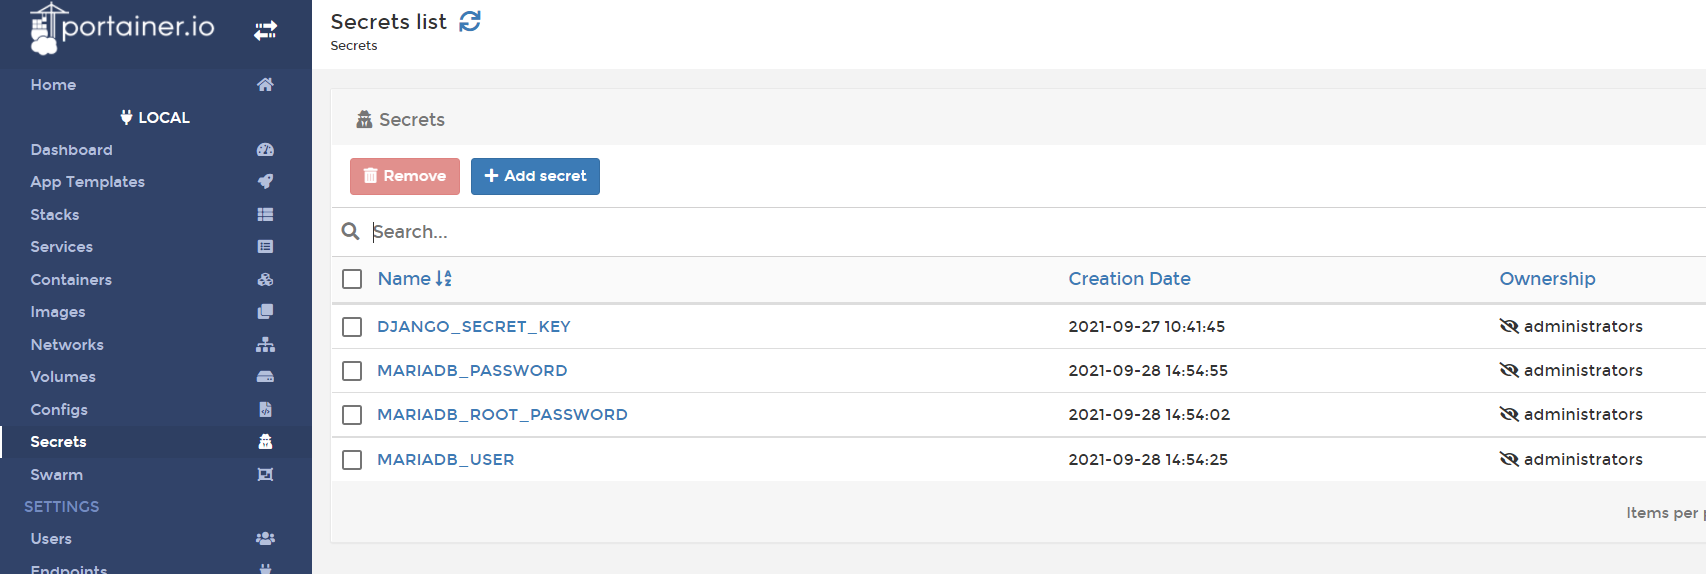

In [ ]:
# C:\Users\HYEON\PycharmProjects\gsweb\docker-compose.yml
version: "3.7"

services:

  nginx:
    image: nginx:1.19.5
    ports:
      - 80:80
    networks:
      - ha_network
    volumes:
      - /home/ubuntu/nginx.conf:/etc/nginx/nginx.conf
      - ha_static:/data/static/
      - ha_media:/data/media/


  django:
    image: ha_django:4
    networks:
      - ha_network
    volumes:
      - ha_static:/home/GSWEB/staticfiles/
      - ha_media:/home/GSWEB/media/
    secrets:
      - DJANGO_SECRET_KEY
      - MARIADB_USER
      - MARIADB_PASSWORD

  mariadb:
    image: mariadb:10.5
    networks:
      - ha_network
    volumes:
      - ha_mariadb:/var/lib/mysql
    secrets:
      - MARIADB_ROOT_PASSWORD
      - MARIADB_USER
      - MARIADB_PASSWORD
    environment:
      MARIADB_ROOT_PASSWORD: password1234
      MARIADB_DATABASE: django
      MARIADB_USER: django
      MARIADB_PASSWORD: password1234


networks:
  ha_network:


volumes:
  ha_static:
  ha_media:
  ha_mariadb:

secrets:
  DJANGO_SECRET_KEY:
    external: true
  MARIADB_ROOT_PASSWORD:
    external: true
  MARIADB_USER:
    external: true
  MARIADB_PASSWORD:
    external: true


In [ ]:
# C:\Users\HYEON\PycharmProjects\gsweb\gsweb\settings\deploy.py
from .base import *

def read_secret(secret_name):
    file = open('/run/secrets/' + secret_name)
    secret = file.read()
    secret = secret.lstrip().rstrip()
    file.close()
    return secret


# SECURITY WARNING: keep the secret key used in production secret!
SECRET_KEY = read_secret('DJANGO_SECRET_KEY')

# SECURITY WARNING: don't run with debug turned on in production!
DEBUG = False

ALLOWED_HOSTS = ["*"]

# Database
# https://docs.djangoproject.com/en/3.2/ref/settings/#databases

DATABASES = {
    'default': {
        'ENGINE': 'django.db.backends.mysql',
        'NAME': 'django',
        'USER': read_secret('MARIADB_USER'),
        'PASSWORD': read_secret('MARIADB_PASSWORD'),
        'HOST': 'mariadb',
        'PORT': '3306',
    }
}


In [ ]:
# C:\Users\HYEON\PycharmProjects\gsweb\docker-compose.yml
version: "3.7"

services:

  nginx:
    image: nginx:1.19.5
    ports:
      - 80:80
    networks:
      - ha_network
    volumes:
      - /home/ubuntu/nginx.conf:/etc/nginx/nginx.conf
      - ha_static:/data/static/
      - ha_media:/data/media/


  django:
    image: ha_django:4
    networks:
      - ha_network
    volumes:
      - ha_static:/home/GSWEB/staticfiles/
      - ha_media:/home/GSWEB/media/
    secrets:
      - DJANGO_SECRET_KEY
      - MARIADB_USER
      - MARIADB_PASSWORD

  mariadb:
    image: mariadb:10.5
    networks:
      - ha_network
    volumes:
      - ha_mariadb:/var/lib/mysql
    secrets:
      - MARIADB_ROOT_PASSWORD
      - MARIADB_USER
      - MARIADB_PASSWORD
    environment:
      MARIADB_ROOT_PASSWORD: password1234
      MARIADB_DATABASE_FILE: /run/secrets/MARIADB_USER
      MARIADB_USER_FILE: /run/secrets/MARIADB_PASSWORD
      MARIADB_PASSWORD_FILE: /run/secrets/MARIADB_ROOT_PASSWORD


networks:
  ha_network:


volumes:
  ha_static:
  ha_media:
  ha_mariadb:

secrets:
  DJANGO_SECRET_KEY:
    external: true
  MARIADB_ROOT_PASSWORD:
    external: true
  MARIADB_USER:
    external: true
  MARIADB_PASSWORD:
    external: true
